In [21]:
import pandas as pd
import yfinance as yf
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sb
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
 
import warnings
warnings.filterwarnings('ignore')
%matplotlib notebook

In [2]:
dbs = yf.Ticker("MSFT")

# define 10 years duration of historical data
df = dbs.history(period = "10y")
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2013-02-25 00:00:00-05:00,23.196137,23.262483,22.698545,22.698545,48011800,0.0,0.0
2013-02-26 00:00:00-05:00,22.706837,22.889289,22.673665,22.698545,49923300,0.0,0.0
2013-02-27 00:00:00-05:00,22.740011,23.221018,22.665372,23.063446,36394700,0.0,0.0
2013-02-28 00:00:00-05:00,23.121495,23.196134,23.005390,23.055149,35840200,0.0,0.0
2013-03-01 00:00:00-05:00,22.988799,23.204423,22.822936,23.179544,34849700,0.0,0.0


<IPython.core.display.Javascript object>


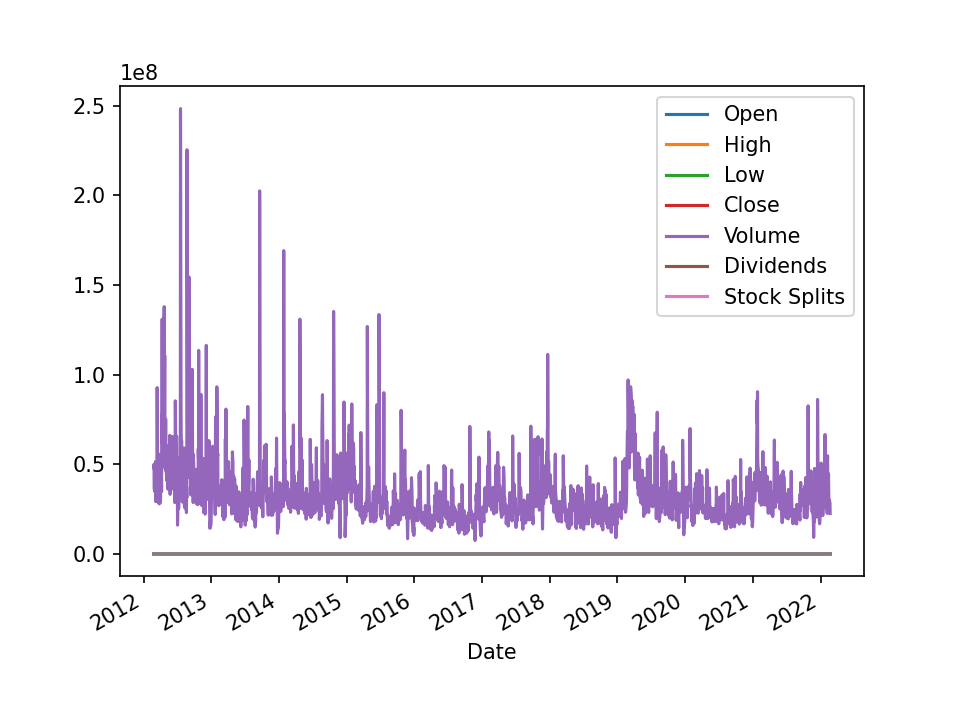

<AxesSubplot:xlabel='Date'>

In [3]:
df.plot()

In [4]:
df['Open'].plot()

<AxesSubplot:xlabel='Date'>

<IPython.core.display.Javascript object>


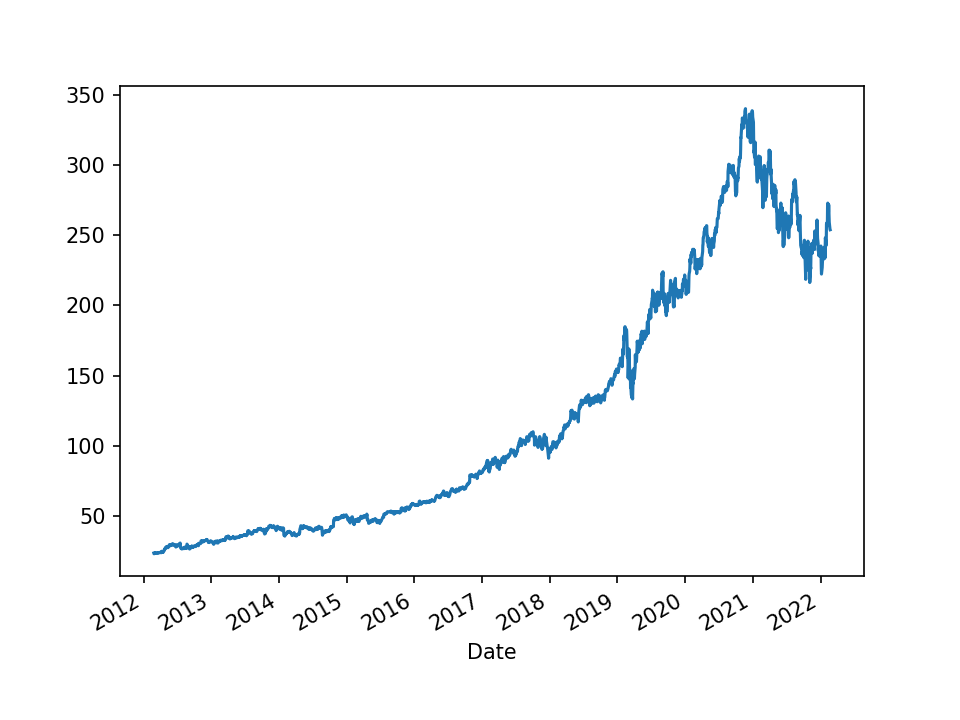

In [5]:
fig1, ax1 = plt.subplots()

In [6]:
df['Open'].plot(ax=ax1)

<AxesSubplot:xlabel='Date'>

<IPython.core.display.Javascript object>


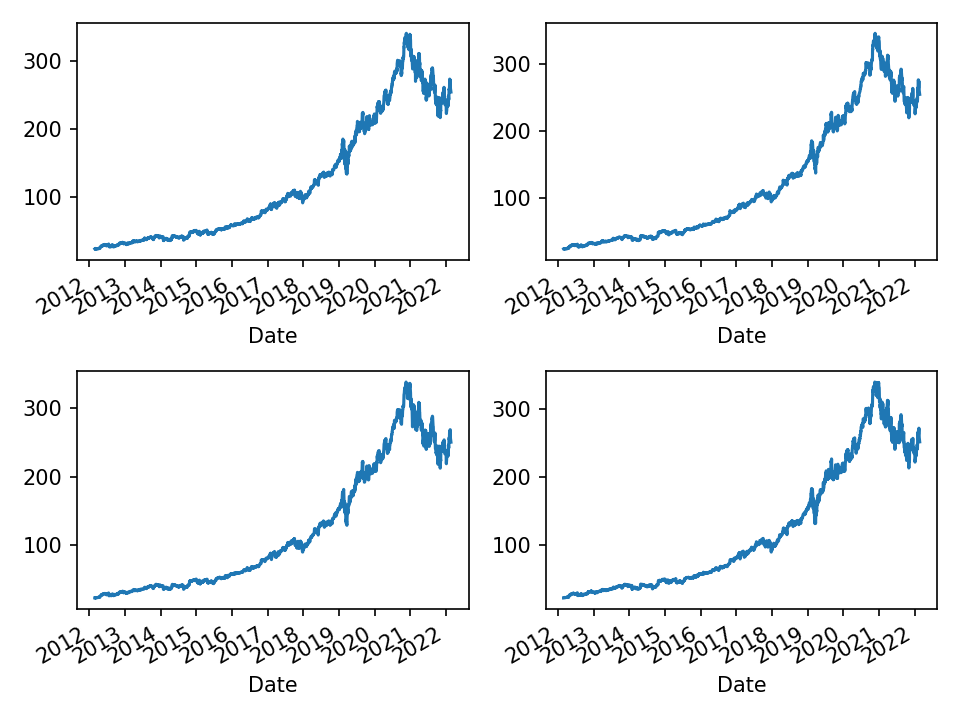

In [7]:
fig2, ax2 = plt.subplots(2, 2)

In [8]:
df['Open'].plot(ax=ax2[0, 0])
df['High'].plot(ax=ax2[0, 1])
df['Low'].plot(ax=ax2[1, 0])
df['Close'].plot(ax=ax2[1, 1])
plt.tight_layout()

<IPython.core.display.Javascript object>


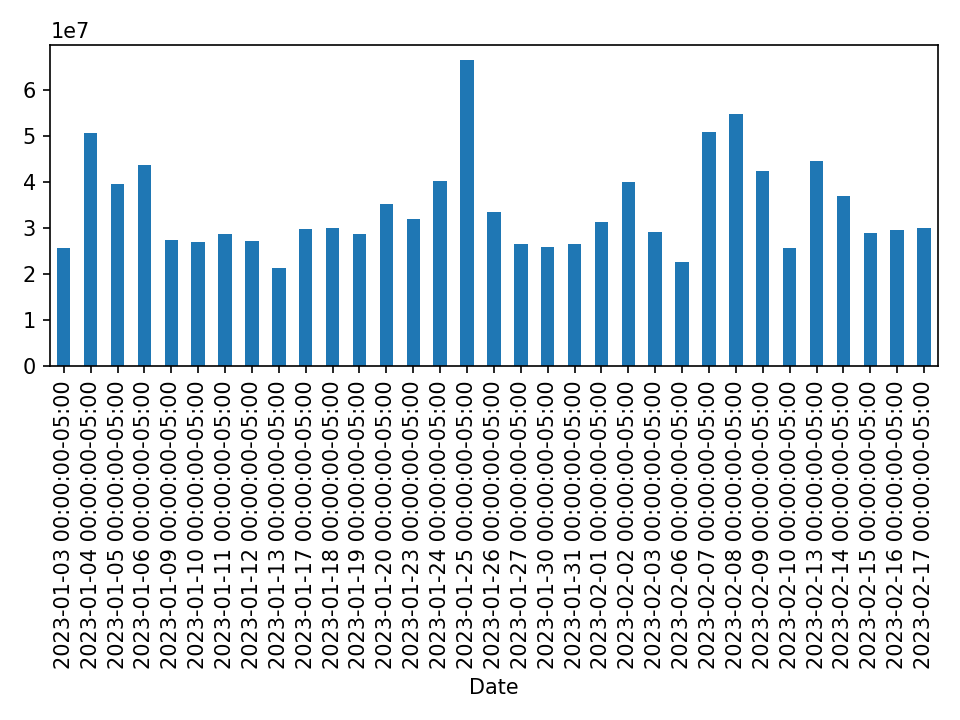

In [9]:
fig3, ax3 = plt.subplots()

In [10]:
df['Volume']

Date
2013-02-25 00:00:00-05:00    48011800
2013-02-26 00:00:00-05:00    49923300
2013-02-27 00:00:00-05:00    36394700
2013-02-28 00:00:00-05:00    35840200
2013-03-01 00:00:00-05:00    34849700
                               ...   
2023-02-15 00:00:00-05:00    28962200
2023-02-16 00:00:00-05:00    29603600
2023-02-17 00:00:00-05:00    29979600
2023-02-21 00:00:00-05:00    28397400
2023-02-22 00:00:00-05:00    22447500
Name: Volume, Length: 2517, dtype: int64

In [12]:
df.loc['2023-01-01':'2023-02-20', 'Volume'].plot.bar(ax=ax3)
plt.tight_layout()

In [15]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03,2517.000000,2517.0
mean,120.148842,121.363495,118.883577,120.185073,3.203504e+07,0.006937,0.0
std,91.217020,92.223000,90.138729,91.222996,1.665978e+07,0.056805,0.0
min,22.706837,22.889289,22.665372,22.698545,7.425600e+06,0.000000,0.0
25%,41.780319,42.156966,41.481418,41.848663,2.240030e+07,0.000000,0.0
50%,86.430872,87.827662,85.751354,86.572449,2.816750e+07,0.000000,0.0
75%,203.632313,205.903574,201.214068,203.164291,3.644650e+07,0.000000,0.0
max,340.567792,345.558430,338.176258,339.075531,2.484285e+08,0.680000,0.0


<IPython.core.display.Javascript object>


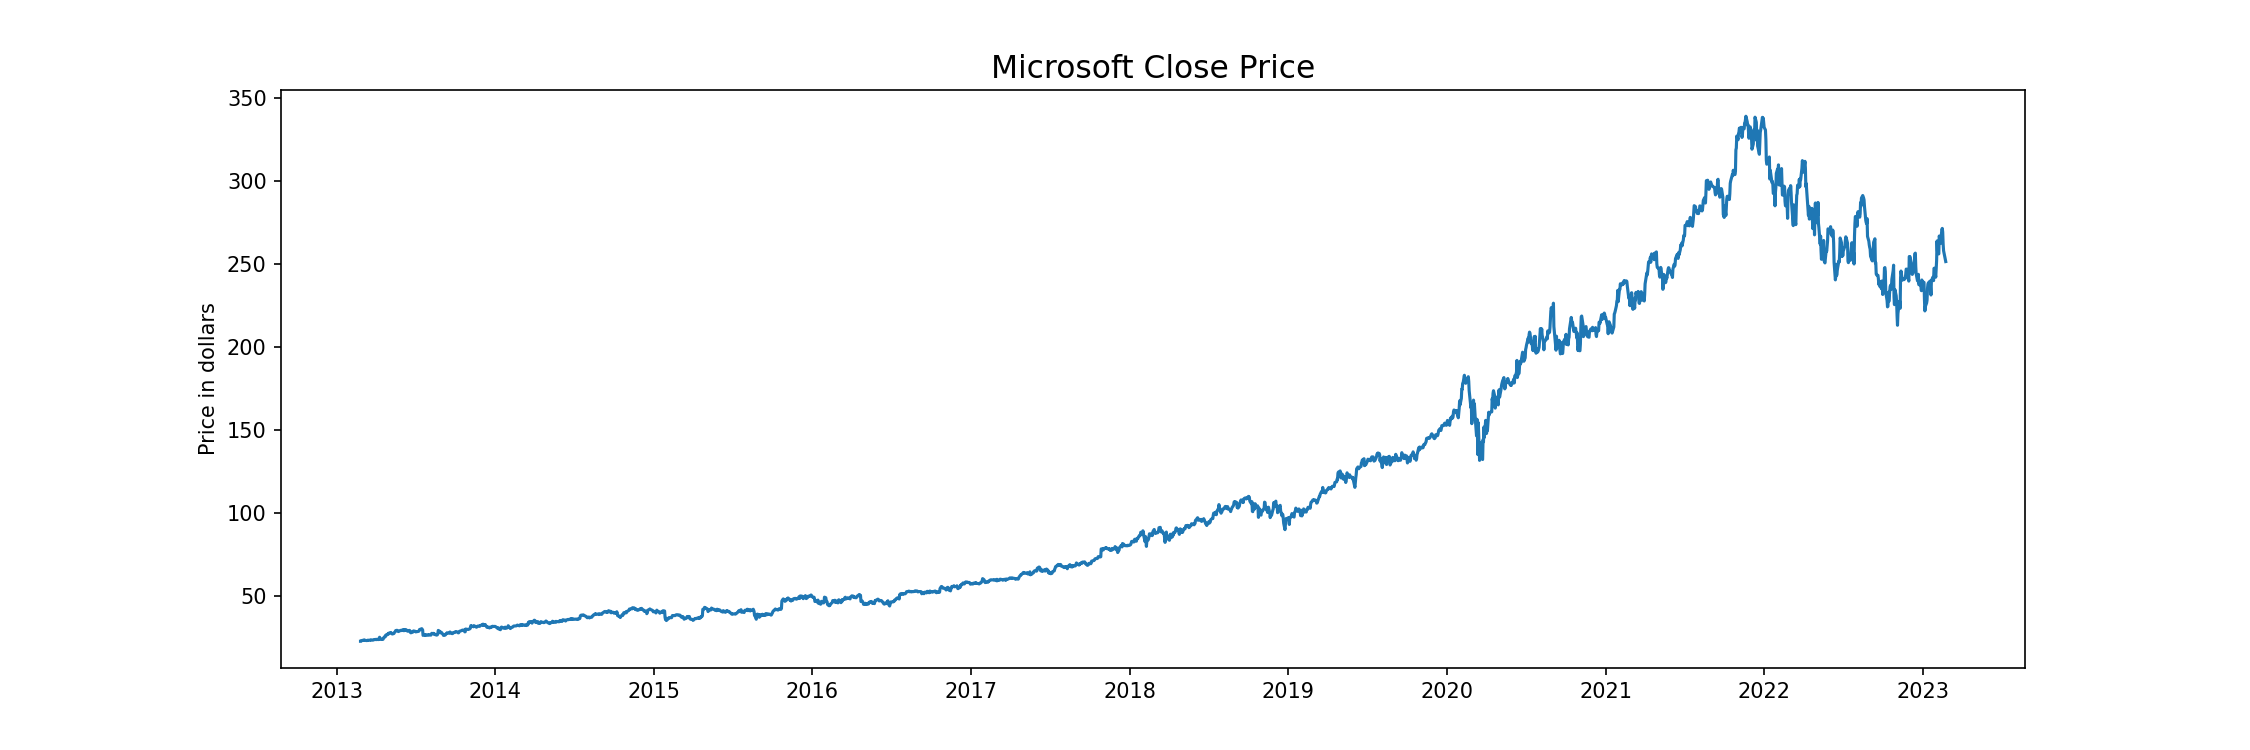

In [16]:
plt.figure(figsize=(15, 5))
plt.plot(df['Close'])
plt.title('Microsoft Close Price', fontsize=15)
plt.ylabel('Price in dollars')
plt.show()

<IPython.core.display.Javascript object>


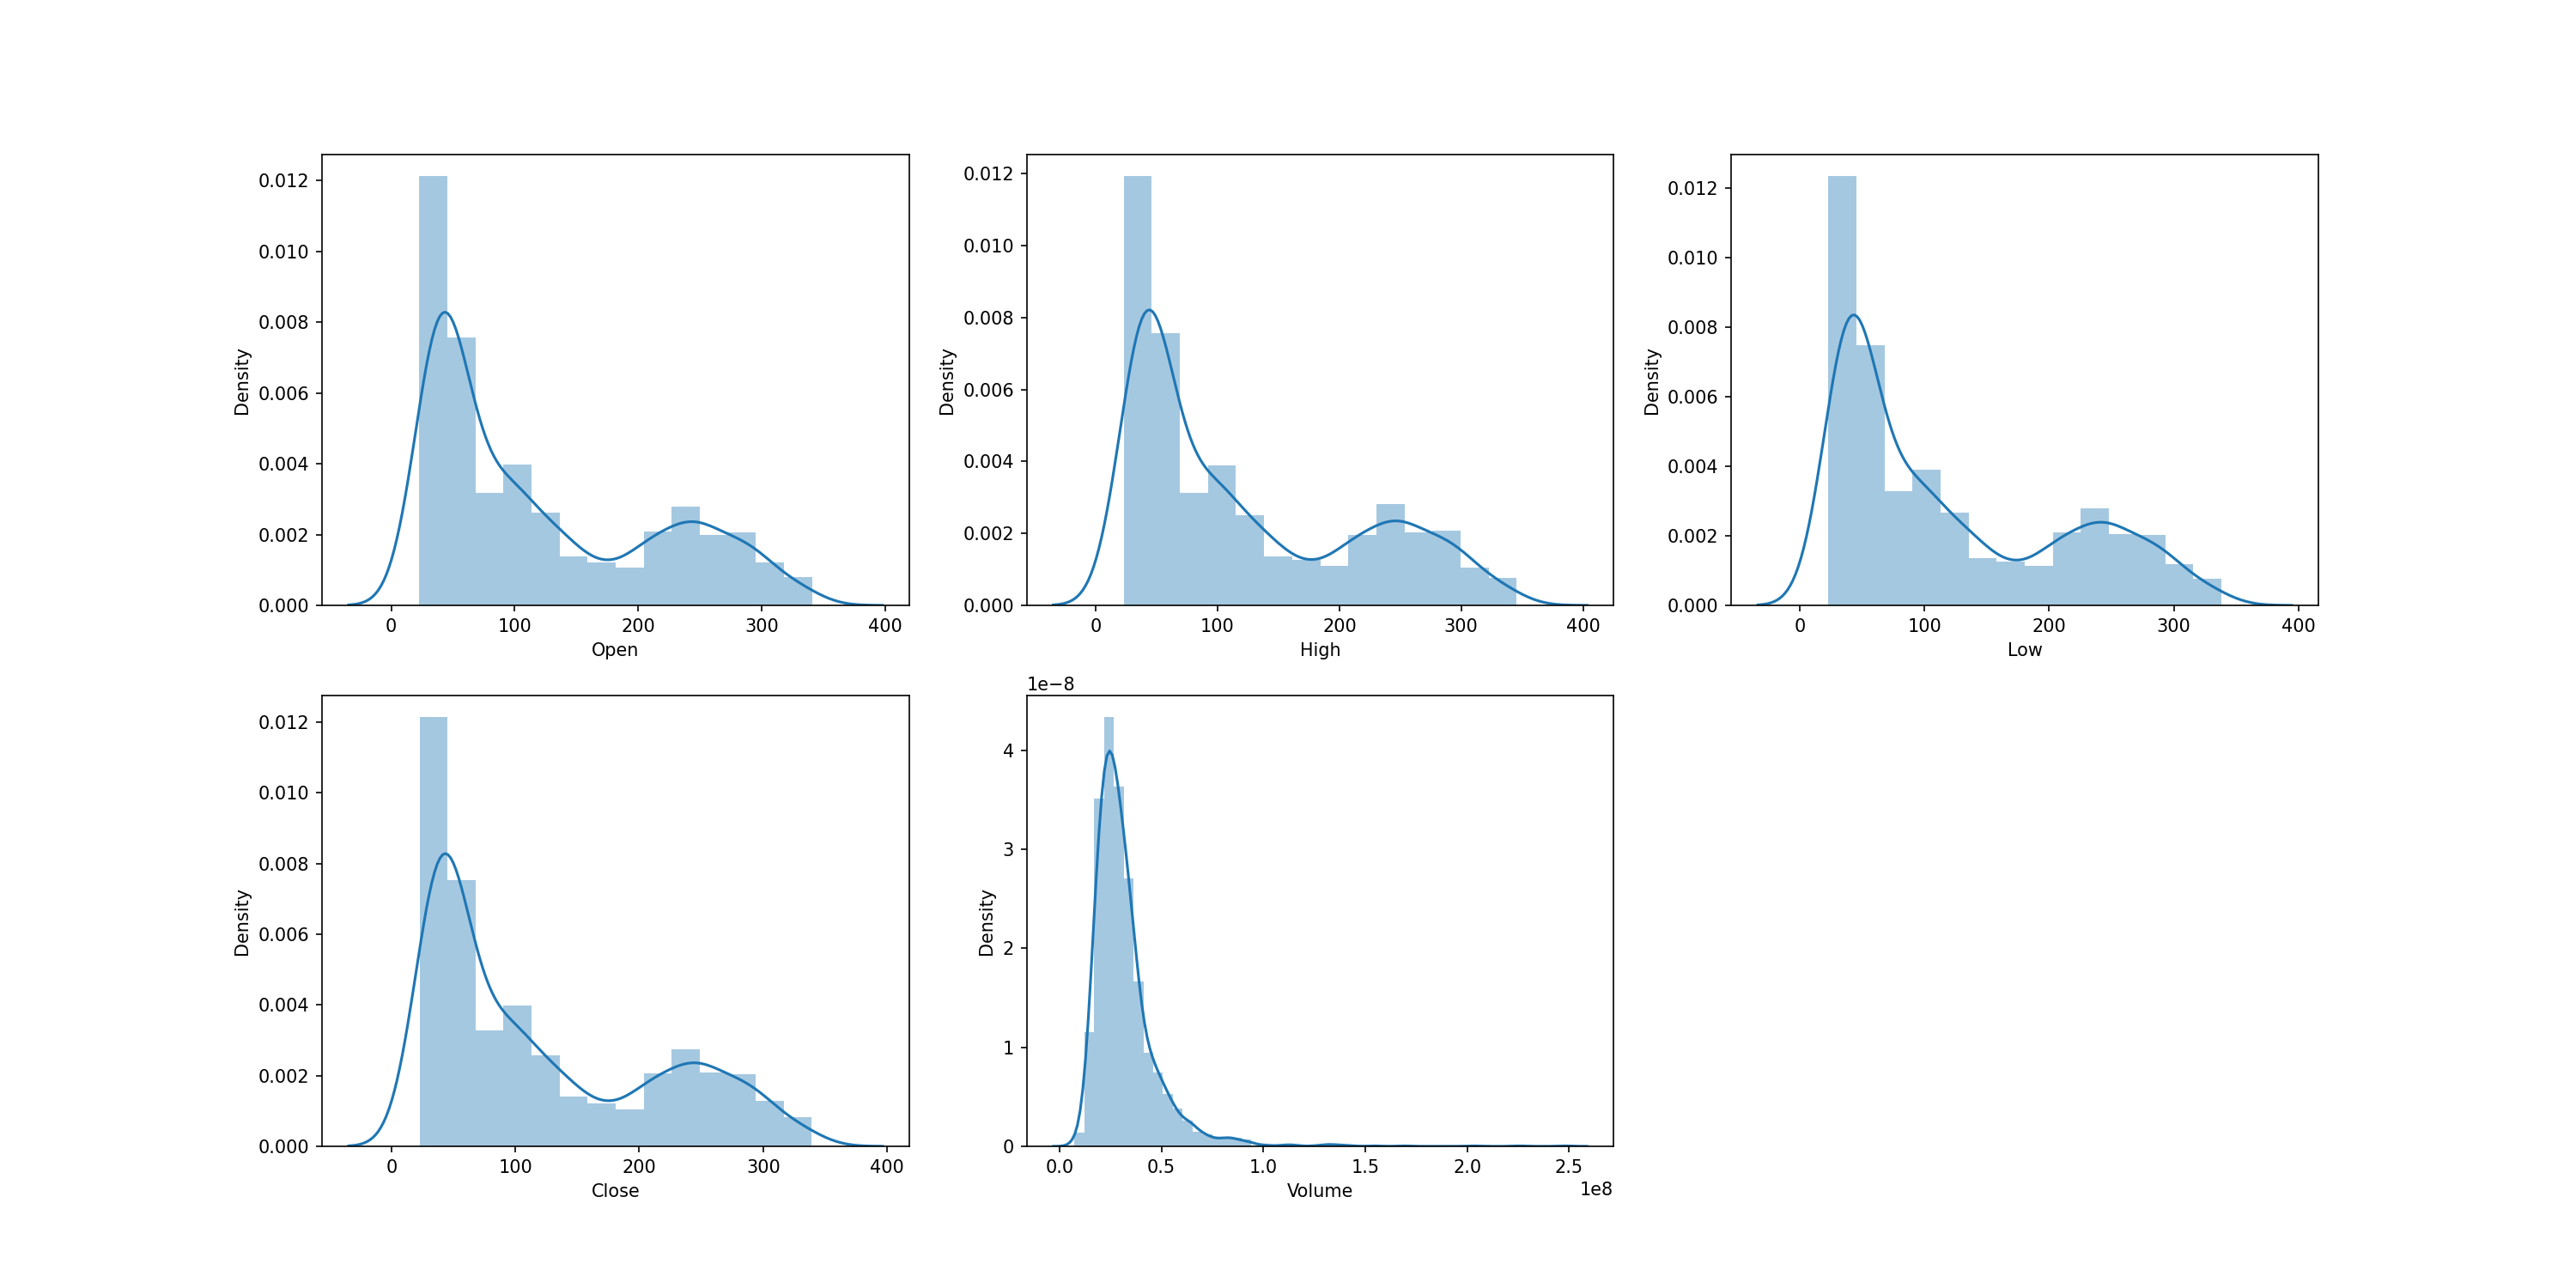

In [22]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20, 10))

for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sb.distplot(df[col])
plt.show()